In [1]:
from z3 import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

from av_goal_recognition.goal_recognition import HandcraftedGoalTrees, TrainedDecisionTrees
from av_goal_recognition.verification import add_goal_tree_model
from av_goal_recognition.data_processing import get_dataset
from av_goal_recognition.feature_extraction import FeatureExtractor
from av_goal_recognition.scenario import ScenarioConfig, Scenario
from av_goal_recognition.base import get_data_dir, get_scenario_config_dir, get_img_dir
from av_goal_recognition.lanelet_helpers import LaneletHelpers

## Handcrafted goal tree

In [2]:
scenario_name = 'heckstrasse'
model = HandcraftedGoalTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)

# unsatisfiable if G2 always has highest prob
verify_expr = Implies(And(features[1]['in_correct_lane'], Not(features[2]['in_correct_lane'])), probs[2] < probs[1])
s.add(Not(verify_expr))

print(s.check())


Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


verified true:
If car is in correct lane for G1, then G1 is predicted

In [3]:
scenario_name = 'heckstrasse'
model = HandcraftedGoalTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)

verify_expr = Implies(And(Not(features[1]['in_correct_lane']),
                          features[2]['in_correct_lane']), probs[2] > probs[1])
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


Verified true:
If car is in correct lane for G2, G2 is predicted


# Trained goal tree

In [4]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)

verify_expr = Implies(And(features[1]['in_correct_lane'],
                          Not(features[2]['in_correct_lane'])),
                      probs[2] < probs[1])
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
sat


In [5]:
s.model()

[likelihood_1_straight-on = 3328868578632209/62500000000000000,
 angle_in_lane_2 = 2,
 likelihood_2_turn-left = 3623861511550757/5000000000000000,
 acceleration_2 = 383992999792099/200000000000000,
 path_to_goal_length_2 = 611815071105957/10000000000000,
 vehicle_in_front_speed_1 = 7422869920730591/500000000000000,
 path_to_goal_length_1 = 783497200012207/10000000000000,
 acceleration_1 = 183992999792099/200000000000000,
 angle_in_lane_1 = 1259317109361291/25000000000000000,
 in_correct_lane_2 = False,
 in_correct_lane_1 = True,
 prob_2_turn-left = 53390224847893295908323083285485/76318343603113298254273810502177,
 prob_1_straight-on = 22928118755220002345950727216692/76318343603113298254273810502177,
 /0 = [(32034134908735977544993849971291/500000000000000000000000000000000,
        228955030809339894762821431506531/2500000000000000000000000000000000) ->
       53390224847893295908323083285485/76318343603113298254273810502177,
       (17196089066415001759463045412519/625000000000000000000000000000000,
        228955030809339894762821431506531/2500000000000000000000000000000000) ->
       22928118755220002345950727216692/76318343603113298254273810502177,
       else -> 0]]

In [6]:
# G1
22928118755220002345950727216692/76318343603113298254273810502177

0.3004273634980291

In [7]:
# G2
53390224847893295908323083285485/76318343603113298254273810502177

0.6995726365019709

Verification failed: If car is in correct lane for G1, then G1 is predicted.
Angle in lane > 0.08

## Investigate examples of this

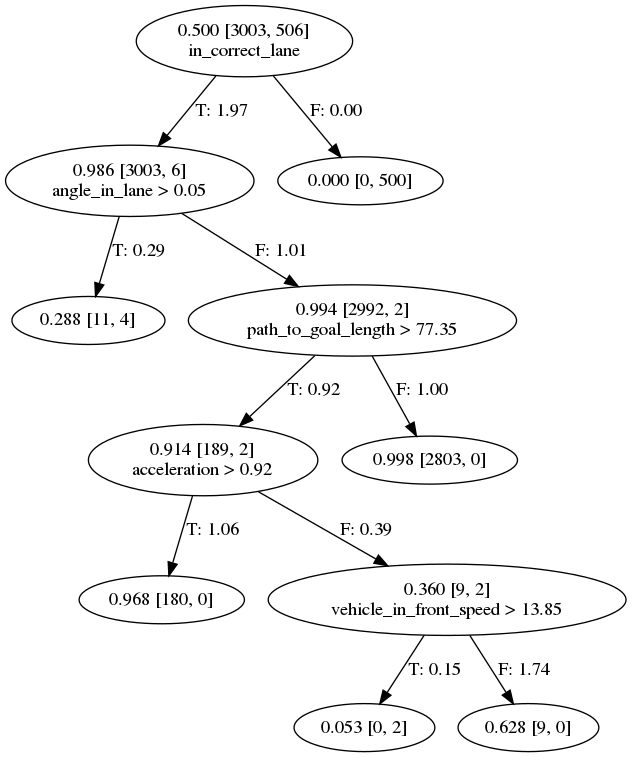

In [8]:
Image("../images/trained_tree_heckstrasse_G1_straight-on.png")

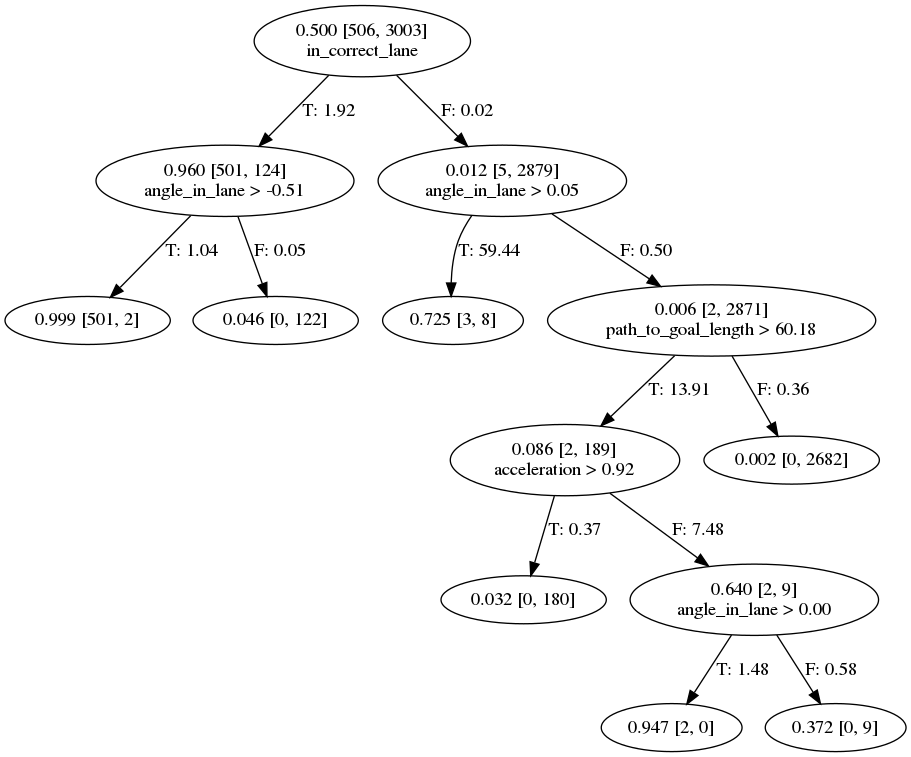

In [9]:
Image("../images/trained_tree_heckstrasse_G2_turn-left.png")

In [10]:
dataset = get_dataset(scenario_name, 'train')

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!


In [11]:
scenario = Scenario.load(get_scenario_config_dir() + '{}.json'.format(scenario_name))

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!


In [12]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)

In [13]:
episode = scenario.load_episode(0)

In [14]:
state = episode.frames[8292].agents[114]

In [15]:
goal_routes = feature_extractor.get_goal_routes(state, scenario.config.goals)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


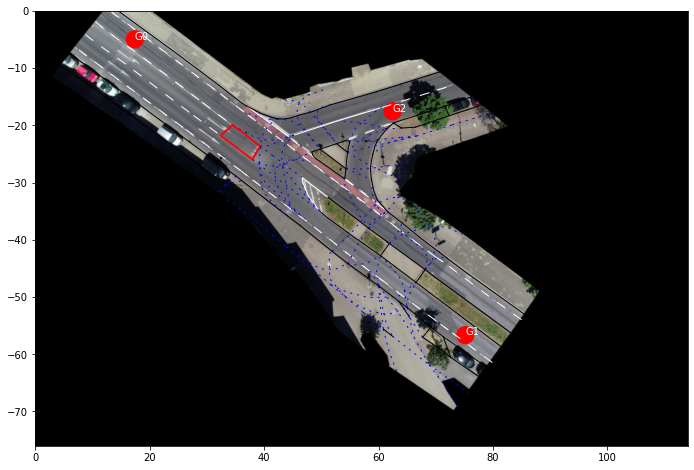

In [16]:
plt.figure(figsize=(12,8))
scenario.plot()
LaneletHelpers.plot(goal_routes[1].shortestPath()[0])

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


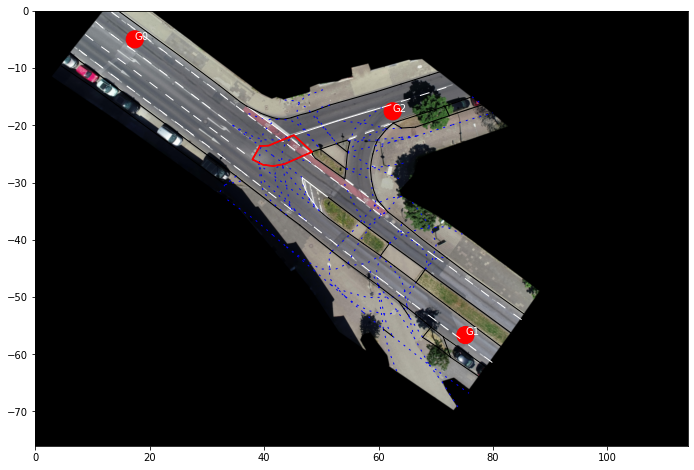

In [17]:
plt.figure(figsize=(12,8))
scenario.plot()
LaneletHelpers.plot(goal_routes[2].shortestPath()[0])

In [18]:
dataset.loc[(dataset.in_correct_lane)  
            & (dataset.angle_in_lane > 0.05)
           & (dataset.possible_goal==1) & (dataset.goal_type=='straight-on')]

,path_to_goal_length,in_correct_lane,speed,acceleration,angle_in_lane,vehicle_in_front_dist,vehicle_in_front_speed,oncoming_vehicle_dist,goal_type,agent_id,possible_goal,true_goal,true_goal_type,frame_id,initial_frame_id,fraction_observed,episode
670,80.783259,True,10.63672,0.67458,0.086457,56.824550,14.20752,100.0,straight-on,40,1,2,turn-left,3034,3034,0.0,0
672,73.372438,True,10.66683,-1.15167,0.098684,59.024640,14.01456,100.0,straight-on,40,1,2,turn-left,3051,3034,0.1,0
1188,80.821166,True,12.27251,1.90442,0.058176,35.776438,13.65600,100.0,straight-on,62,1,1,straight-on,4503,4503,0.0,0
1194,71.417351,True,13.23665,0.30552,0.059522,36.273210,13.82256,100.0,straight-on,62,1,1,straight-on,4521,4503,0.3,0
1429,73.620898,True,13.83128,0.86535,0.050037,100.000000,20.00000,100.0,straight-on,74,1,1,straight-on,5235,5223,0.2,0
3060,79.896733,True,11.21285,2.01138,0.051077,49.325921,14.48603,100.0,straight-on,142,1,1,straight-on,10230,10230,0.0,0
2277,76.045139,True,5.59533,1.77753,0.072196,74.771432,13.47259,100.0,straight-on,225,1,1,straight-on,13975,13975,0.0,1
2279,73.875362,True,6.29698,1.67858,0.060645,100.000000,20.00000,100.0,straight-on,225,1,1,straight-on,13984,13975,0.1,1
2281,71.490534,True,6.85697,1.33906,0.061313,100.000000,20.00000,100.0,straight-on,225,1,1,straight-on,13993,13975,0.2,1
1103,57.251157,True,8.44261,0.94966,0.056181,17.062702,9.16979,100.0,straight-on,59,1,1,straight-on,3002,2932,0.7,2


Reasons for wrong lane:
1. Start of trajectory, has not yet changed lane

heckstrasse agent 114 frame 8292 get current lanelet?


In [19]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)


verify_expr = Implies(And(Not(features[1]['in_correct_lane']), features[2]['in_correct_lane']), probs[2] > probs[1])
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


Verified true: If car is in correct lane for G2, G2 is predicted

# Verify bound on probability if in the correct lane
If we are in the correct lane for a goal, the the probabilty of that goal should be > 0.2
Heckstrasse - coming from west

In [20]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)


verify_expr = Implies(And(features[1]['in_correct_lane'],
                          Not(features[2]['in_correct_lane'])), probs[1] >= 0.2)
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


In [21]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)


verify_expr = Implies(And(Not(features[1]['in_correct_lane']),
                          features[2]['in_correct_lane']), probs[2] >= 0.2)
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


For both goals, this is verified to be true

# Verify prob based on angle in lane, approaching T Junction

In [22]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(0, 'turn-right'), (1, 'turn-left')]

s = Solver()

features, probs = add_goal_tree_model(reachable_goals, s, model)

s.add(features[0]['angle_in_lane'] >= np.pi / 8)
s.add(features[1]['angle_in_lane'] >= np.pi / 8)

verify_expr =  probs[1] >= 0.1
s.add(Not(verify_expr))

print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
unsat


In [23]:
2346984033116499/62500000000000000

0.037551744529863984

In [24]:
52939762064801009122130908858125/55512532424702459568794311420649

0.9536542426092491

In [25]:
2572770359901450446663402562524/55512532424702459568794311420649

0.04634575739075086

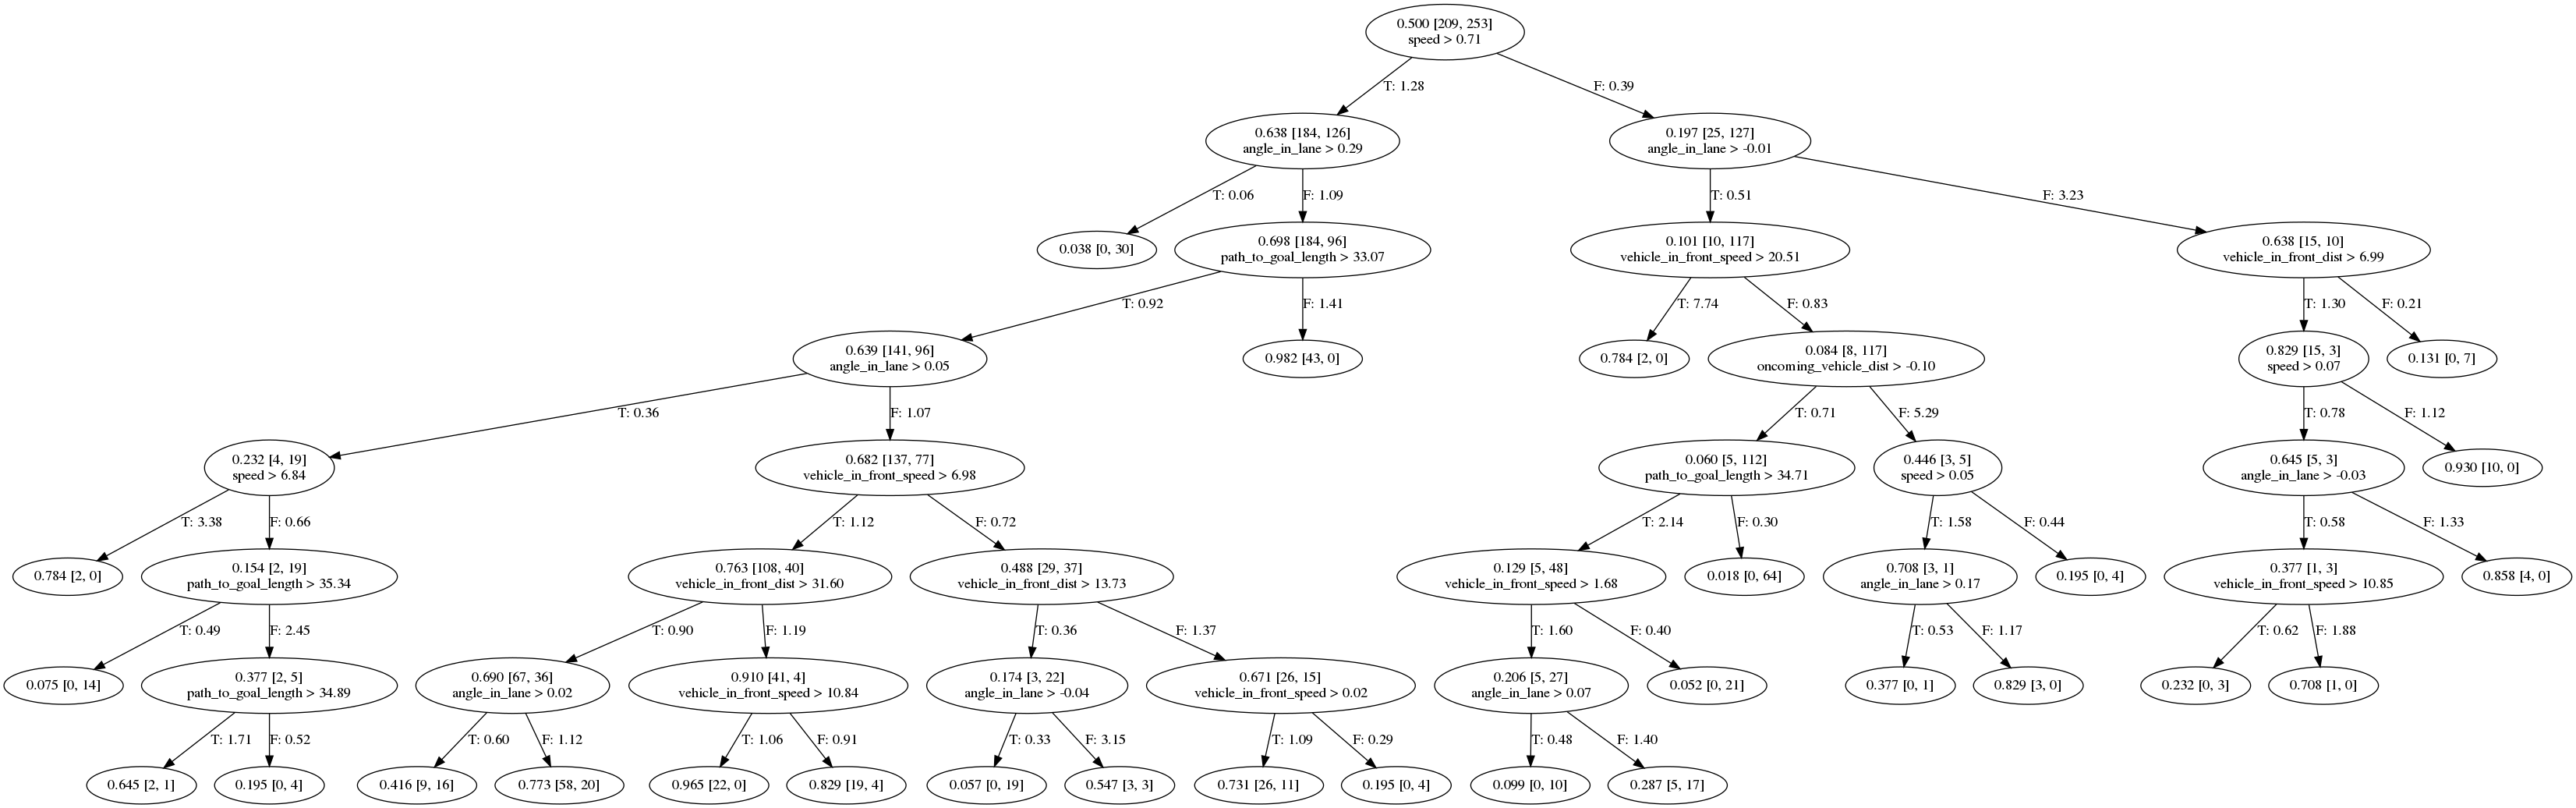

In [26]:
Image("../images/trained_tree_heckstrasse_G0_turn-right.png")

In [27]:
2346984033116499/62500000000000000

0.037551744529863984

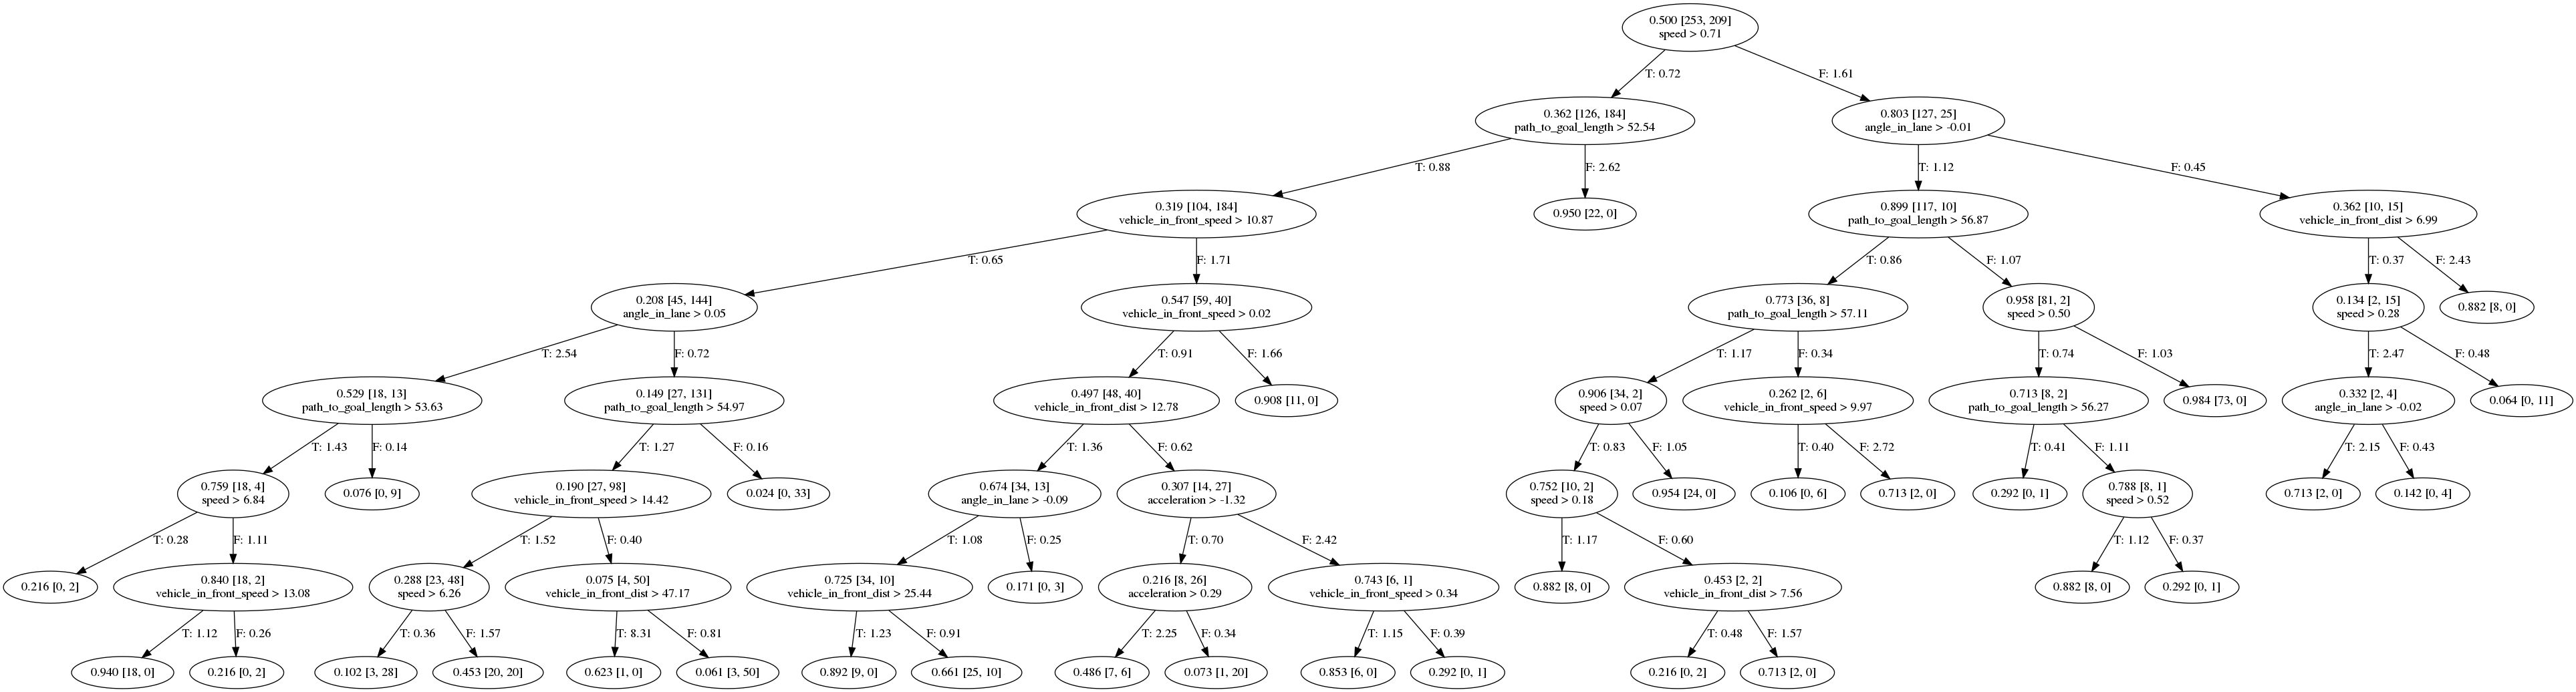

In [28]:
Image("../images/trained_tree_heckstrasse_G1_turn-left.png")

In [29]:
6231454005934719/10000000000000000

0.6231454005934719

In [30]:
model.goal_priors

,true_goal,true_goal_type,prior
0,0,turn-right,0.034530
1,0,straight-on,0.267956
2,1,turn-left,0.042818
3,1,straight-on,0.516575
4,1,u-turn,0.001381
5,2,turn-left,0.088398
6,2,turn-right,0.048343


# Verify that decreasing path to goal length leads to decreasing entropy
Can easily be done when there are two goals
Start with heckstrasse approaching from west

In [31]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

# 2 has shorter path to goal length than 1, but all other features are equal
features1, probs1 = add_goal_tree_model(reachable_goals, s, model, suffix='_1')
features2, probs2 = add_goal_tree_model(reachable_goals, s, model, suffix='_2')

for goal_idx, goal_type in reachable_goals:
    s.add(features1[goal_idx]['path_to_goal_length'] \
          > features2[goal_idx]['path_to_goal_length'])
    
    for feature_name in features1[goal_idx]:
        if feature_name != 'path_to_goal_length':
            s.add(features1[goal_idx][feature_name] == features2[goal_idx][feature_name])


verify_expr = And(Implies(probs1[1] < probs1[2], probs2[2] >= probs1[2]), 
                  Implies(probs1[1] > probs1[2], probs2[1] >= probs1[1]))

s.add(Not(verify_expr))


print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
sat


In [32]:
s.model()

[likelihood_2_turn-left_2 = 35256017633877/16000000000000000,
 likelihood_1_straight-on_2 = 1683813668581631/5000000000000000000,
 likelihood_2_turn-left_1 = 15848730096759557/500000000000000000,
 angle_in_lane_2_2 = -1,
 path_to_goal_length_2_1 = 62,
 path_to_goal_length_2_2 = 59,
 likelihood_1_straight-on_1 = 1683813668581631/5000000000000000000,
 path_to_goal_length_1_1 = 1/8,
 path_to_goal_length_1_2 = -1,
 in_correct_lane_1_2 = False,
 in_correct_lane_2_2 = False,
 acceleration_2_2 = 383992999792099/200000000000000,
 vehicle_in_front_speed_1_2 = 7422869920730591/500000000000000,
 acceleration_1_2 = 383992999792099/200000000000000,
 angle_in_lane_1_2 = 26259317109361291/25000000000000000,
 oncoming_vehicle_dist_2_2 = 0,
 oncoming_vehicle_dist_2_1 = 0,
 vehicle_in_front_speed_2_2 = 0,
 vehicle_in_front_speed_2_1 = 0,
 vehicle_in_front_dist_2_2 = 0,
 vehicle_in_front_dist_2_1 = 0,
 angle_in_lane_2_1 = -1,
 acceleration_2_1 = 383992999792099/200000000000000,
 speed_2_2 = 0,
 speed_2_1 = 0,
 in_correct_lane_2_1 = False,
 oncoming_vehicle_dist_1_2 = 0,
 oncoming_vehicle_dist_1_1 = 0,
 vehicle_in_front_speed_1_1 = 7422869920730591/500000000000000,
 vehicle_in_front_dist_1_2 = 0,
 vehicle_in_front_dist_1_1 = 0,
 angle_in_lane_1_1 = 26259317109361291/25000000000000000,
 acceleration_1_1 = 383992999792099/200000000000000,
 speed_1_2 = 0,
 speed_1_1 = 0,
 in_correct_lane_1_1 = False,
 prob_2_turn-left_2 = 12985641854098344188989774327125/24583179829227809648801218976353,
 prob_1_straight-on_2 = 11597537975129465459811444649228/24583179829227809648801218976353,
 prob_2_turn-left_1 = 46699757191188387508825432121897/49599141684970753873778293284204,
 prob_1_straight-on_1 = 2899384493782366364952861162307/49599141684970753873778293284204,
 /0 = [(311655404498360260535754583851/1600000000000000000000000000000000,
        73749539487683428946403656929059/200000000000000000000000000000000000) ->
       12985641854098344188989774327125/24583179829227809648801218976353,
       (8698153481347099094858583486921/50000000000000000000000000000000000,
        73749539487683428946403656929059/200000000000000000000000000000000000) ->
       11597537975129465459811444649228/24583179829227809648801218976353,
       (140099271573565162526476296365691/50000000000000000000000000000000000,
        37199356263728065405333719963153/12500000000000000000000000000000000) ->
       46699757191188387508825432121897/49599141684970753873778293284204,
       (8698153481347099094858583486921/50000000000000000000000000000000000,
        37199356263728065405333719963153/12500000000000000000000000000000000) ->
       2899384493782366364952861162307/49599141684970753873778293284204,
       else -> 0]]

verification failed
Counterexample:
path_to_goal_length_1_1 = -1/4
path_to_goal_length_1_2 = -2

This features caused the difference:
path_to_goal_length_2_1 = 62
path_to_goal_length_2_2 = 59

likelihood_2_turn-left_1 = 0.032
likelihood_2_turn-left_2 = 0.002

likelihood_1_straight-on_1 = 0.0003
likelihood_1_straight-on_2 = 0.0003

in_correct_lane is false for both goals - should not be possible

In [33]:
prob_2_turn_left_2 = 12985641854098344188989774327125/24583179829227809648801218976353
prob_1_straight_on_2 = 11597537975129465459811444649228/24583179829227809648801218976353
prob_2_turn_left_1 = 46699757191188387508825432121897/49599141684970753873778293284204
prob_1_straight_on_1 = 2899384493782366364952861162307/49599141684970753873778293284204



In [34]:
print(prob_1_straight_on_1)
print(prob_1_straight_on_2)
print(prob_2_turn_left_1)
print(prob_2_turn_left_2)

0.058456344107682835
0.4717672024406193
0.9415436558923171
0.5282327975593807


In [35]:
1683813668581631/5000000000000000000

0.0003367627337163262

## Try verification again, restricting feature values based on domain knowledge

Eventually domain model / feature extraction could be represented in logic

In [36]:
scenario_name = 'heckstrasse'
model = TrainedDecisionTrees.load(scenario_name)
reachable_goals = [(1, 'straight-on'), (2, 'turn-left')]

s = Solver()

# 2 has shorter path to goal length than 1, but all other features are equal
features1, probs1 = add_goal_tree_model(reachable_goals, s, model, suffix='_1')
features2, probs2 = add_goal_tree_model(reachable_goals, s, model, suffix='_2')

for goal_idx, goal_type in reachable_goals:
    s.add(features1[goal_idx]['path_to_goal_length'] \
          > features2[goal_idx]['path_to_goal_length'])
    
    for feature_name in features1[goal_idx]:
        if feature_name != 'path_to_goal_length':
            s.add(features1[goal_idx][feature_name] == features2[goal_idx][feature_name])

s.add(features1[1]['in_correct_lane'] != features1[2]['in_correct_lane'])

            
verify_expr = And(Implies(probs1[1] < probs1[2], probs2[2] == probs1[2]), 
                  Implies(probs1[1] > probs1[2], probs2[1] == probs1[1]))

s.add(Not(verify_expr))


print(s.check())

Errors ocurred while parsing Lanelet Map:
	- Error parsing primitive -1770767: Lanelet has not exactly one left border!
	- Error parsing primitive -1770767: Lanelet has not exactly one right border!
	- Error parsing primitive -1770766: Lanelet has not exactly one left border!
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770573
	- Error parsing primitive -1770787: Could not complete boundary around linestring -1770492
	- Error parsing primitive -1770787: Areas must have exactly one outer ring!
sat


In [37]:
s.model()

[path_to_goal_length_1_2 = -1,
 likelihood_2_turn-left_2 = 35256017633877/16000000000000000,
 likelihood_1_straight-on_2 = 28828658074298713/100000000000000000,
 likelihood_2_turn-left_1 = 15848730096759557/500000000000000000,
 angle_in_lane_2_2 = -1,
 path_to_goal_length_2_1 = 62,
 in_correct_lane_1_2 = True,
 path_to_goal_length_2_2 = 59,
 likelihood_1_straight-on_1 = 28828658074298713/100000000000000000,
 path_to_goal_length_1_1 = 1/4,
 acceleration_2_2 = 383992999792099/200000000000000,
 vehicle_in_front_speed_1_2 = 7422869920730591/500000000000000,
 acceleration_1_2 = 383992999792099/200000000000000,
 angle_in_lane_1_2 = 26259317109361291/25000000000000000,
 in_correct_lane_2_2 = False,
 oncoming_vehicle_dist_2_2 = 0,
 oncoming_vehicle_dist_2_1 = 0,
 vehicle_in_front_speed_2_2 = 0,
 vehicle_in_front_speed_2_1 = 0,
 vehicle_in_front_dist_2_2 = 0,
 vehicle_in_front_dist_2_1 = 0,
 angle_in_lane_2_1 = -1,
 acceleration_2_1 = 383992999792099/200000000000000,
 speed_2_2 = 0,
 speed_2_1 = 0,
 in_correct_lane_2_1 = False,
 oncoming_vehicle_dist_1_2 = 0,
 oncoming_vehicle_dist_1_1 = 0,
 vehicle_in_front_speed_1_1 = 7422869920730591/500000000000000,
 vehicle_in_front_dist_1_2 = 0,
 vehicle_in_front_dist_1_1 = 0,
 angle_in_lane_1_1 = 26259317109361291/25000000000000000,
 acceleration_1_1 = 383992999792099/200000000000000,
 speed_1_2 = 0,
 speed_1_1 = 0,
 in_correct_lane_1_1 = True,
 prob_2_turn-left_2 = 519425674163933767559590973085/397643481651612122628980082248773,
 prob_1_straight-on_2 = 397124055977448188861420491275688/397643481651612122628980082248773,
 prob_2_turn-left_1 = 46699757191188387508825432121897/2528725107050239567892703502594947,
 prob_1_straight-on_1 = 2482025349859051180383878070473050/2528725107050239567892703502594947,
 /0 = [(311655404498360260535754583851/1600000000000000000000000000000000,
        1192930444954836367886940246746319/8000000000000000000000000000000000) ->
       519425674163933767559590973085/397643481651612122628980082248773,
       (148921520991543070823032684228383/1000000000000000000000000000000000,
        1192930444954836367886940246746319/8000000000000000000000000000000000) ->
       397124055977448188861420491275688/397643481651612122628980082248773,
       (140099271573565162526476296365691/50000000000000000000000000000000000,
        7586175321150718703678110507784841/50000000000000000000000000000000000) ->
       46699757191188387508825432121897/2528725107050239567892703502594947,
       (148921520991543070823032684228383/1000000000000000000000000000000000,
        7586175321150718703678110507784841/50000000000000000000000000000000000) ->
       2482025349859051180383878070473050/2528725107050239567892703502594947,
       else -> 0]]

In [38]:
likelihood_2_turn_left_2 = 35256017633877/16000000000000000
likelihood_1_straight_on_2 = 28828658074298713/100000000000000000
likelihood_2_turn_left_1 = 15848730096759557/500000000000000000
likelihood_1_straight_on_1 = 28828658074298713/100000000000000000

In [40]:

print(likelihood_1_straight_on_1)
print(likelihood_1_straight_on_2)
print(likelihood_2_turn_left_1)
print(likelihood_2_turn_left_2)


0.28828658074298713
0.28828658074298713
0.031697460193519114
0.0022035011021173125


Not verified - different child node reached  depending path to goal length
When further from goal, acceleration is informative - high acceleration means lower G2 likelihood

Looks like overfitting - see tree below

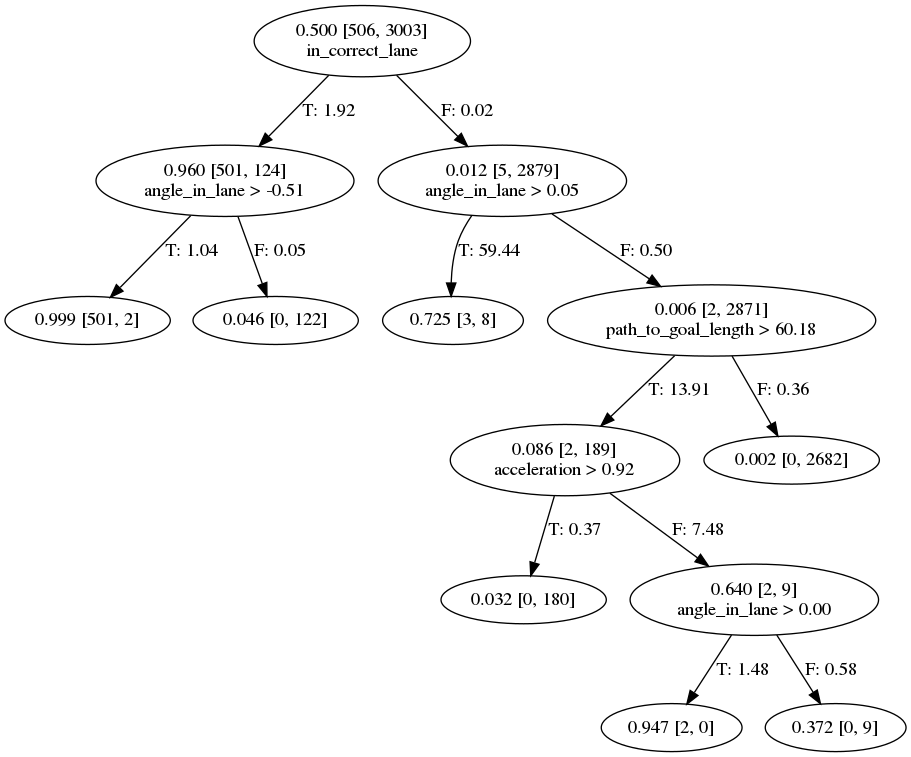

In [43]:
Image('../images/trained_tree_heckstrasse_G2_turn-left.png')